In [ ]:
pip install kaggle

**LOAD THE DATASET**

In [ ]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi

os.environ['KAGGLE_USERNAME'] = 'your_kaggle_username'
os.environ['KAGGLE_KEY'] = 'your_kaggle_api_key'

api = KaggleApi()
api.authenticate()

dataset = 'Cornell-University/arxiv'
api.dataset_download_files(dataset, path='.', unzip=True)



Dataset URL: https://www.kaggle.com/datasets/Cornell-University/arxiv


In [ ]:
import pandas as pd

file_path = 'arxiv-metadata-oai-snapshot.json'

def process_chunk(chunk):
    print(chunk.head(1))

chunk_size = 10000
chunks = []
for chunk in pd.read_json(file_path, lines=True, chunksize=chunk_size):
    chunks.append(chunk)
df = pd.concat(chunks, ignore_index=True)



In [ ]:
df.columns

Index(['id', 'submitter', 'authors', 'title', 'comments', 'journal-ref', 'doi',
       'report-no', 'categories', 'license', 'abstract', 'versions',
       'update_date', 'authors_parsed'],
      dtype='object')

In [ ]:
print(len(df))

2496754


In [ ]:
df['categories']

0                              hep-ph
1                       math.CO cs.CG
2                      physics.gen-ph
3                             math.CO
4                     math.CA math.FA
                      ...            
2496749    supr-con cond-mat.supr-con
2496750    supr-con cond-mat.supr-con
2496751    supr-con cond-mat.supr-con
2496752    supr-con cond-mat.supr-con
2496753    supr-con cond-mat.supr-con
Name: categories, Length: 2496754, dtype: object

In [ ]:
df.head(5)

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,704.0001,Pavel Nadolsky,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",10.1103/PhysRevD.76.013009,ANL-HEP-PR-07-12,hep-ph,None,A fully differential calculation in perturba...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2008-11-26,"[[Balázs, C., ], [Berger, E. L., ], [Nadolsky,..."
1,704.0002,Louis Theran,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,To appear in Graphs and Combinatorics,None,None,None,math.CO cs.CG,http://arxiv.org/licenses/nonexclusive-distrib...,"We describe a new algorithm, the $(k,\ell)$-...","[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2008-12-13,"[[Streinu, Ileana, ], [Theran, Louis, ]]"
2,704.0003,Hongjun Pan,Hongjun Pan,The evolution of the Earth-Moon system based o...,"23 pages, 3 figures",None,None,None,physics.gen-ph,None,The evolution of Earth-Moon system is descri...,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2008-01-13,"[[Pan, Hongjun, ]]"
3,704.0004,David Callan,David Callan,A determinant of Stirling cycle numbers counts...,11 pages,None,None,None,math.CO,None,We show that a determinant of Stirling cycle...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2007-05-23,"[[Callan, David, ]]"
4,704.0005,Alberto Torchinsky,Wael Abu-Shammala and Alberto Torchinsky,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,None,"Illinois J. Math. 52 (2008) no.2, 681-689",None,None,math.CA math.FA,None,In this paper we show how to compute the $\L...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2013-10-15,"[[Abu-Shammala, Wael, ], [Torchinsky, Alberto, ]]"


In [ ]:
astro_categories = [
    'astro-ph',
    'astro-ph.CO',
    'astro-ph.EP',
    'astro-ph.GA',
    'astro-ph.HE',
    'astro-ph.IM',
    'astro-ph.SR'
]

mask = df['categories'].str.contains('|'.join(astro_categories))

astro_df = df[mask]

print(len(astro_df))

342696


**VISUALISATION**

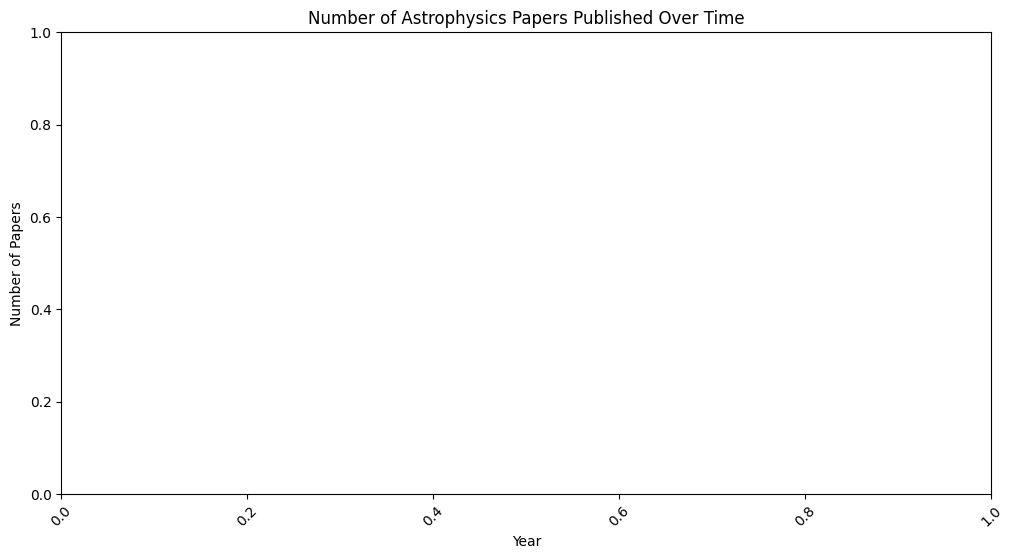

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 6))
sns.countplot(data=astro_df)
plt.title('Number of Astrophysics Papers Published Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Papers')
plt.xticks(rotation=45)
plt.show()


<ipython-input-15-4f199eb83758>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  astro_df['categories'] = astro_df['categories'].str.split()


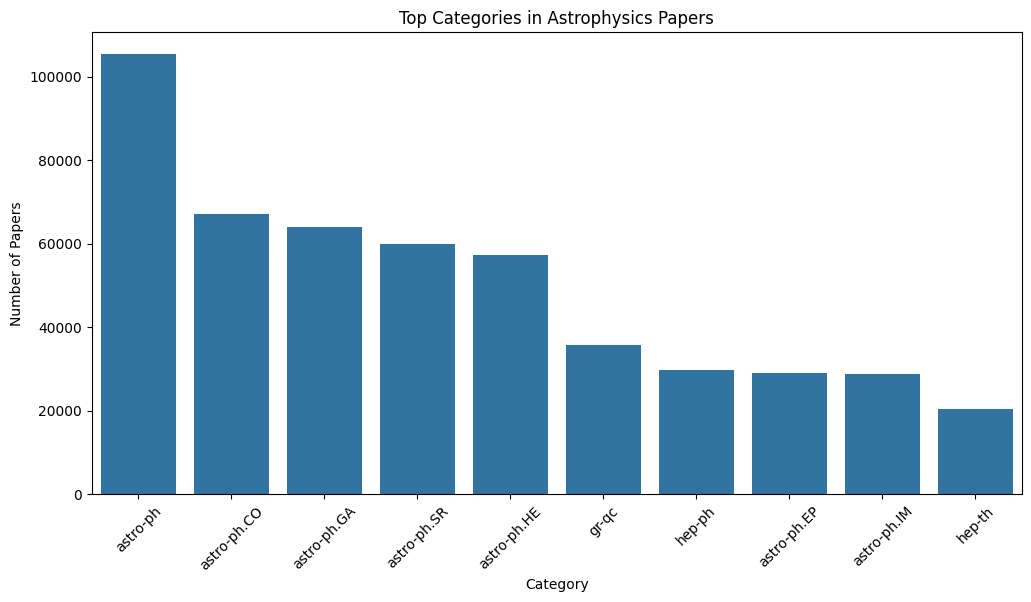

In [ ]:
astro_df['categories'] = astro_df['categories'].str.split()
astro_df_exploded = astro_df.explode('categories')

top_categories = astro_df_exploded['categories'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories.index, y=top_categories.values)
plt.title('Top Categories in Astrophysics Papers')
plt.xlabel('Category')
plt.ylabel('Number of Papers')
plt.xticks(rotation=45)
plt.show()


In [ ]:
from wordcloud import WordCloud

all_abstracts = ' '.join(astro_df['abstract'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_abstracts)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Abstracts in Astrophysics Papers')
plt.show()


NameError: name 'astro_df' is not defined

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features=20)

tfidf_matrix = vectorizer.fit_transform(astro_df['abstract'])

feature_names = vectorizer.get_feature_names_out()

tfidf_scores = tfidf_matrix.sum(axis=0).A1

tfidf_df = pd.DataFrame({'Term': feature_names, 'TF-IDF': tfidf_scores}).sort_values(by='TF-IDF', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=tfidf_df['Term'], y=tfidf_df['TF-IDF'])
plt.title('Top Terms by TF-IDF in Abstracts of Astrophysics Papers')
plt.xlabel('Term')
plt.ylabel('TF-IDF Score')
plt.xticks(rotation=45)
plt.show()


**CONSIDERING ONE RESEARCH PAPER**

In [ ]:
selected_paper = astro_df.iloc[0]

print("Title:", selected_paper['title'])
print("Abstract:", selected_paper['abstract'])

Title: The Spitzer c2d Survey of Large, Nearby, Insterstellar Clouds. IX. The
  Serpens YSO Population As Observed With IRAC and MIPS
Abstract:   We discuss the results from the combined IRAC and MIPS c2d Spitzer Legacy
observations of the Serpens star-forming region. In particular we present a set
of criteria for isolating bona fide young stellar objects, YSO's, from the
extensive background contamination by extra-galactic objects. We then discuss
the properties of the resulting high confidence set of YSO's. We find 235 such
objects in the 0.85 deg^2 field that was covered with both IRAC and MIPS. An
additional set of 51 lower confidence YSO's outside this area is identified
from the MIPS data combined with 2MASS photometry. We describe two sets of
results, color-color diagrams to compare our observed source properties with
those of theoretical models for star/disk/envelope systems and our own modeling
of the subset of our objects that appear to be star+disks. These objects
exhibit a 

**PREPROCESS THE DATA**

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


def preprocess_text(text):

    tokens = word_tokenize(text.lower())


    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]


    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return tokens

abstract = selected_paper['abstract']
processed_abstract = preprocess_text(abstract)

print("Processed Abstract:", processed_abstract)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Processed Abstract: ['discus', 'result', 'combined', 'irac', 'mips', 'spitzer', 'legacy', 'observation', 'serpens', 'region', 'particular', 'present', 'set', 'criterion', 'isolating', 'bona', 'fide', 'young', 'stellar', 'object', 'yso', 'extensive', 'background', 'contamination', 'object', 'discus', 'property', 'resulting', 'high', 'confidence', 'set', 'yso', 'find', 'object', 'field', 'covered', 'irac', 'mips', 'additional', 'set', 'lower', 'confidence', 'yso', 'outside', 'area', 'identified', 'mips', 'data', 'combined', 'photometry', 'describe', 'two', 'set', 'result', 'diagram', 'compare', 'observed', 'source', 'property', 'theoretical', 'model', 'system', 'modeling', 'subset', 'object', 'appear', 'object', 'exhibit', 'wide', 'range', 'disk', 'property', 'many', 'fit', 'actively', 'accreting', 'disk', 'passive', 'disk', 'even', 'possibly', 'debris', 'disk', 'find', 'luminosity', 'function', 'yso', 'serpens', 'extends', 'least', 'x', 'lsun', 'lower', 'assumed', 'distance', 'pc', 'low

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

documents = [abstract]

vectorizer = TfidfVectorizer(stop_words='english')

tfidf_matrix = vectorizer.fit_transform(documents)

feature_names = vectorizer.get_feature_names_out()

tfidf_scores = tfidf_matrix.toarray()[0]

tfidf_df = pd.DataFrame({'Term': feature_names, 'TF-IDF': tfidf_scores})

tfidf_df = tfidf_df.sort_values(by='TF-IDF', ascending=False)

print(tfidf_df.head(10))


           Term    TF-IDF
106         yso  0.428845
68      objects  0.268028
89          set  0.268028
46     galactic  0.214423
40        extra  0.214423
32        disks  0.214423
97         star  0.160817
64         mips  0.160817
81   properties  0.160817
88      serpens  0.160817
